In [13]:
import random


class Bandit:
    def __init__(self, p):
        self.true_means = p  # True means of each arm
        self.estimated_means = [0.0] * len(p)  # Estimated means of each arm
        self.action_counts = [0] * len(p)  # Number of times each arm is pulled

    def pull(self):
        pass  # Implement pulling logic in subclasses

    def update(self, arm, reward):
        pass  # Implement update logic in subclasses

    def experiment(self, num_trials):
        rewards = []
        for _ in range(num_trials):
            arm = self.pull()  # Choose an arm to pull
            reward = self.true_means[arm]  # Get the true reward for the chosen arm
            self.update(arm, reward)  # Update the bandit based on the chosen arm and reward
            rewards.append(reward)
        return rewards

    def report(self, rewards):
        # Store data in CSV (You can implement this)
        average_reward = sum(rewards) / len(rewards)
        average_regret = max(self.true_means) - average_reward
        print(f"Average Reward: {average_reward}")
        print(f"Average Regret: {average_regret}")

class EpsilonGreedy(Bandit):
    def __init__(self, p, epsilon):
        super().__init__(p)
        self.epsilon = epsilon

    def pull(self):
        if random.random() < self.epsilon:
            return random.randint(0, len(self.true_means) - 1)  # Explore
        else:
            return self.estimated_means.index(max(self.estimated_means))  # Exploit

    def update(self, arm, reward):
        self.action_counts[arm] += 1
        n = self.action_counts[arm]
        self.estimated_means[arm] += (1 / n) * (reward - self.estimated_means[arm])  # Sample average update
        self.epsilon /= n  # Decay epsilon

class ThompsonSampling(Bandit):
    def __init__(self, p):
        super().__init__(p)
        self.alpha = [1] * len(p)  # Number of successes
        self.beta = [1] * len(p)   # Number of failures

    def pull(self):
        sampled_means = [random.betavariate(self.alpha[i], self.beta[i]) for i in range(len(self.true_means))]
        return sampled_means.index(max(sampled_means))

    def update(self, arm, reward):
        if reward == 1:
            self.alpha[arm] += 1
        else:
            self.beta[arm] += 1

# Usage example:
Bandit_Reward = [1, 2, 3, 4]
NumberOfTrials = 20000

epsilon_greedy_bandit = EpsilonGreedy(Bandit_Reward, 0.1)
epsilon_greedy_rewards = epsilon_greedy_bandit.experiment(NumberOfTrials)
epsilon_greedy_bandit.report(epsilon_greedy_rewards)

thompson_bandit = ThompsonSampling(Bandit_Reward)
thompson_rewards = thompson_bandit.experiment(NumberOfTrials)
thompson_bandit.report(thompson_rewards)

Average Reward: 2.9999
Average Regret: 1.0001000000000002
Average Reward: 1.00045
Average Regret: 2.99955


Epsilon Greedy Cumulative Reward: 1999.9999999992765
Epsilon Greedy Cumulative Regret: 12000.000000000724
Thompson Sampling Cumulative Reward: 8012.6000000007025
Thompson Sampling Cumulative Regret: 5987.3999999992975


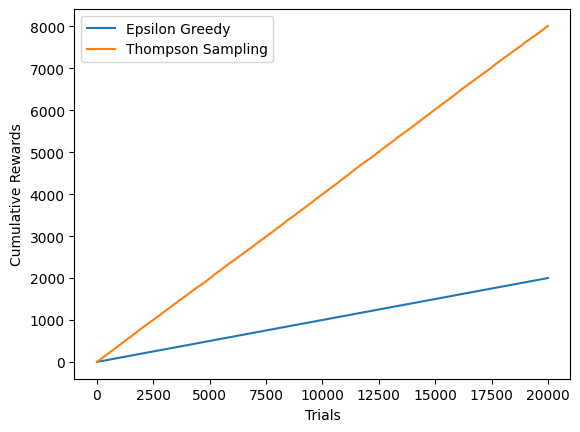

In [15]:
import random
import matplotlib.pyplot as plt
import csv

class Bandit:
    def __init__(self, p):
        self.true_means = p
        self.estimated_means = [0.0] * len(p)
        self.action_counts = [0] * len(p)
        self.cumulative_rewards = [0.0]

    def pull(self):
        pass

    def update(self, arm, reward):
        pass

    def experiment(self, num_trials):
        rewards = []
        for _ in range(num_trials):
            arm = self.pull()
            reward = self.true_means[arm]
            self.update(arm, reward)
            rewards.append(reward)
            self.cumulative_rewards.append(self.cumulative_rewards[-1] + reward)
        return rewards

    def report(self, rewards, algorithm_name):
        self.save_rewards_to_csv(rewards, algorithm_name)
        self.plot_learning_process(rewards, algorithm_name)
        self.print_cumulative_metrics(rewards, algorithm_name)

    def save_rewards_to_csv(self, rewards, algorithm_name):
        with open('bandit_rewards.csv', 'a', newline='') as csvfile:
            csvwriter = csv.writer(csvfile)
            for reward in rewards:
                csvwriter.writerow([algorithm_name, reward])

    def plot_learning_process(self, rewards, algorithm_name):
        plt.plot(self.cumulative_rewards[1:], label=algorithm_name)
        plt.xlabel('Trials')
        plt.ylabel('Cumulative Rewards')
        plt.legend()

    def print_cumulative_metrics(self, rewards, algorithm_name):
        cumulative_reward = sum(rewards)
        cumulative_regret = max(self.true_means) * len(rewards) - cumulative_reward
        print(f"{algorithm_name} Cumulative Reward: {cumulative_reward}")
        print(f"{algorithm_name} Cumulative Regret: {cumulative_regret}")


class EpsilonGreedy(Bandit):
    def __init__(self, p, epsilon):
        super().__init__(p)
        self.epsilon = epsilon

    def pull(self):
        if random.random() < self.epsilon:
            return random.randint(0, len(self.true_means) - 1)
        else:
            return self.estimated_means.index(max(self.estimated_means))

    def update(self, arm, reward):
        self.action_counts[arm] += 1
        n = self.action_counts[arm]
        self.estimated_means[arm] += (1 / n) * (reward - self.estimated_means[arm])
        self.epsilon /= n

class ThompsonSampling(Bandit):
    def __init__(self, p):
        super().__init__(p)
        self.alpha = [1] * len(p)
        self.beta = [1] * len(p)

    def pull(self):
        sampled_means = [random.betavariate(self.alpha[i], self.beta[i]) for i in range(len(self.true_means))]
        return sampled_means.index(max(sampled_means))

    def update(self, arm, reward):
        if reward == 1:
            self.alpha[arm] += 1
        else:
            self.beta[arm] += 1

# Usage example:
Bandit_Reward = [0.1, 0.3, 0.5, 0.7]  # Replace with your bandit reward probabilities
NumberOfTrials = 20000

epsilon_greedy_bandit = EpsilonGreedy(Bandit_Reward, 0.1)
epsilon_greedy_rewards = epsilon_greedy_bandit.experiment(NumberOfTrials)
epsilon_greedy_bandit.report(epsilon_greedy_rewards, 'Epsilon Greedy')

thompson_bandit = ThompsonSampling(Bandit_Reward)
thompson_rewards = thompson_bandit.experiment(NumberOfTrials)
thompson_bandit.report(thompson_rewards, 'Thompson Sampling')

plt.show()  # Display the learning process plot